<h1 style="text-align: center; font-size: 60px;"> Интеллектуальный анализ и обработка данных</h1>
<hr>
<h2 style="text-align: center;font-size: 40px;"> ЛАБОРАТОРНАЯ РАБОТА №1 <br>
 Разведочный и предиктивный анализ данных на основе регрессионных моделей</h2>
 <hr>

<h3 style="text-align: center; font-size: 30px;">Исполнители</h3>
<p><b>Корзун Николай Вадимович</b> <a href="https://github.com/nikoloskorzun">GitHub</a></p>


<hr>
<h3 style="text-align: center; font-size: 30px;">Постановка задачи</h3>

<p>Дан многомерный размеченный набор данных. Необходимо выполнить предиктивный анализ данных на основе регрессионных моделей в соответствии со следующей последовательностью этапов.</p> 

<ol>
    <li>Загрузить необходимые пакеты и библиотеки.  </li>
    <li>Загрузить данные из указанного источника.  
    <li>Выполнить разведочный анализ данных в соответствии с этапами описанными в файле Этапы проекта машинного обучения в примерах 1/2.pdf: 
    <ol>
        <li>Ознакомление с данными с помощью методов описательной статистики;  </li>
        <li>Выполнить визуализацию данных одномерную для понимания распределения данных и многомерную для выяснения зависимостей между признаками;  </li>
        <li>При необходимости выполнить очистку данных одним из методов.  </li>
        <li>Проанализировать корреляционную зависимость между признаками;  </li>
        <li>Поэкспериментировать с комбинациями атрибутов. При необходимости добавить новые атрибуты в набор данных.  </li>
        <li>Выполнить отбор существенных признаков. Сформировать набор данных из существенных признаков.  </li>
        <li>При необходимости преобразовать текстовые или категориальные признаки одним из методов.  </li>
        <li>Выполнить масштабирование данных для обоих наборов (исходного и сформированного) одним из методов по варианту. </li>
    </ol>
    </li>
    <li>Анализ выполняется для исходного набора данных, масштабированного (п.3.h) набора исходного данных, построенного набора данных (удаление неинформативных, добавление пользовательских ризнаков, приведение нечисловых признаков к численному виду) и масштабированного построенного набора данных. Во всех наборах данных выделить обучающую и тестовую выборки данных.  </li>
<li>Сравнить линейную (по варианту) и полиномиальную регрессионные модели на обучающих выборках для всех наборов данных, включая их масштабированные варианты. Для оценки качества моделей использовать метрики: корень из среднеквадратичной ошибки, R2.  </li>
<li>Для лучшей модели на лучшем наборе данных выполнить Grid поиск лучшего гиперпараметра регрессионной модели на обучающей выборке. Построить графики результатов поиска. Определить значение лучшего гиперпараметра. </li> 
<li>Для лучшей модели на лучшем наборе данных выполнить Grid поиск лучшего гиперпараметра регрессионной модели на тестовом наборе. Построить графики результатов поиска. Скорректировать значение лучшего гиперпараметра модели.  </li>
<li>Сделать выводы по проведенному анализу.</li>
    
</ol>
<p><b>Вариант №12</b></p>
<p>Набор данных различных форм зданий, различающихся по площади остекления, распределению площади остекления, ориентации и другим параметрам. <br>В зависимости от параметров здания других признаков аргументов. Построить регрессионную модель оценки целевого признака требований к тепловой нагрузке зданий:</p>

<ol>
    <li>X1 вещественный, относительная компактность</li>
    <li>X2 вещественный, площадь поверхности</li>
    <li>X3 вещественный, площадь сплошной стены</li>
    <li>X4 вещественный, зона крыши</li>
    <li>X5 вещественный, общая высота</li>
    <li>X6 целочисленный, ориентация</li>
    <li>X7 вещественный, площадь сплошного остекления</li>
    <li>X8 целочисленный, распределение площади остекления</li>    
    <li>Y1 целевой признак, вещественный, отопительная нагрузка</li>
</ol>

a. Пункт 3.h – Нормализация
b. Пункт 4 – гребневая регрессия (регуляризованная линейная регрессия

<h3 style="text-align: center; font-size: 30px;">Выполнение задачи</h3>
<h4 style="text-align: center; font-size: 24px;">Этап 2<br>Загрузка датасета</h4>

In [1]:
names = ['относительная компактность', 'площадь поверхности', 'площадь сплошной стены',
         'зона крыши', 'общая высота', 'ориентация', 'площадь сплошного остекления',
         'распределение площади остекления', 'отопительная нагрузка']


In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


from IPython.core.display import HTML
from IPython.display import display

import ipywidgets as widgets


import pandas as pd

import seaborn as sns





import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer, OrdinalEncoder, PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score


In [3]:
global df
df = pd.read_excel("../../V12.xlsx", names = names)
global corr

<h4 style="text-align: center; font-size: 24px;">Этап 3<br>Разведочный анализ данных</h4>
<h5 style="text-align: center; font-size: 20px;">Описательная статистика</h5>

In [4]:
HTML(f'<p>размерность набора данных: <b>{df.shape}</b></p>')

In [5]:
print("Типы атрибутов:", end="\n\n")
df.info()
#df.head()

Типы атрибутов:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   относительная компактность        768 non-null    float64
 1   площадь поверхности               768 non-null    float64
 2   площадь сплошной стены            768 non-null    float64
 3   зона крыши                        768 non-null    float64
 4   общая высота                      768 non-null    float64
 5   ориентация                        768 non-null    int64  
 6   площадь сплошного остекления      768 non-null    float64
 7   распределение площади остекления  768 non-null    int64  
 8   отопительная нагрузка             768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [6]:
pd.set_option('display.precision', 3)
df.describe()

,относительная компактность,площадь поверхности,площадь сплошной стены,зона крыши,общая высота,ориентация,площадь сплошного остекления,распределение площади остекления,отопительная нагрузка
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,0.764,671.708,318.500,176.604,5.250,3.500,0.234,2.812,22.307
std,0.106,88.086,43.626,45.166,1.751,1.119,0.133,1.551,10.090
min,0.620,514.500,245.000,110.250,3.500,2.000,0.000,0.000,6.010
25%,0.682,606.375,294.000,140.875,3.500,2.750,0.100,1.750,12.992
50%,0.750,673.750,318.500,183.750,5.250,3.500,0.250,3.000,18.950
75%,0.830,741.125,343.000,220.500,7.000,4.250,0.400,4.000,31.668
max,0.980,808.500,416.500,220.500,7.000,5.000,0.400,5.000,43.100


##### Анализ статических данных
### Анализ статистических параметров

#### 1. **Общий обзор**
Таблица содержит 768 записей по различным характеристикам зданий и их отопительной нагрузки. Включены параметры, связанные с компактностью, площадями, высотой, ориентацией, остеклением и тепловыми потерями.

#### **Размах данных**
- **Относительная компактность**: от 0.62 до 0.98 (разброс небольшой, здания имеют схожие пропорции).
- **Площадь поверхности**: 514.5–808.5 м² (значительный разброс, здания разного размера).
- **Площадь сплошной стены**: 245–416.5 м².
- **Зона крыши**: 110.25–220.5 м².
- **Общая высота**: 3.5–7 м (здания от 1 до 2 этажей, если 3.5 м — высота одного этажа).
- **Ориентация**: от 2 до 5 (предположительно кодирование направлений света).
- **Площадь сплошного остекления**: от 0 до 0.4 (0 означает отсутствие остекления, 0.4 — максимальная доля).
- **Распределение площади остекления**: от 0 до 5 (возможно, 0 — отсутствие, 5 — равномерное распределение по всем стенам).
- **Отопительная нагрузка**: от 6.01 до 43.1 (энергетические затраты на отопление значительно варьируются).

#### **Центральные тенденции**
- **Средние значения** дают представление о типичном здании:
  - Относительная компактность — 0.764.
  - Площадь остекления — 0.234 (т.е. стекло занимает около 23% площади стен).
  - Отопительная нагрузка — 22.307 (средние теплопотери).

#### **Разброс данных**
- Большая стандартная ошибка у площади поверхности (88.086) и площади стены (43.626) — значит, здания значительно различаются по этим параметрам.
- Ориентация имеет дискретные значения с небольшой дисперсией (std = 1.119).
- Площадь остекления сильно варьируется (std = 0.133), что указывает на разницу в проектных решениях.



<h5 style="text-align: center; font-size: 20px;">Визуализация данных</h5>

In [7]:

# Функции для расчета количества бинов по разным правилам
def sturges_bins(data):
    n = len(data)
    return int(np.ceil(np.log2(n)) + 1)

def scott_bins(data):
    h = 3.5 * np.std(data) / (len(data) ** (1/3))
    return int(np.ceil((np.max(data) - np.min(data)) / h))

def fd_bins(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    h = 2 * iqr / (len(data) ** (1/3))
    return int(np.ceil((np.max(data) - np.min(data)) / h))

def sqrt_bins(data):
    return int(np.ceil(np.sqrt(len(data))))

# Словарь с доступными правилами
rules_dict = {
    '100_n': lambda _: 100,
    'sturges': sturges_bins,
    'scott': scott_bins,
    'fd': fd_bins,
    'sqrt': sqrt_bins,
    '50_n': lambda _: 50,
    '20_n': lambda _: 20,
    '10_n': lambda _: 10,

}
# Создаем выпадающие списки для каждого столбца
rule_widgets = {column: widgets.Dropdown(options=list(rules_dict.keys()), description=f'{column}:') for column in df.columns}

# Функция для обновления графиков
def update_plots(**rules):
    n_cols = 3  # Количество графиков в ряду
    n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Количество рядов
    
    # Создаем subplot с помощью Plotly
    fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=df.columns)
    
    for i, column in enumerate(df.columns):
        row = (i // n_cols) + 1
        col = (i % n_cols) + 1
        
        rule = rules[column]  # Получаем правило для текущего столбца
        
        # Выбираем количество бинов в зависимости от правила

        bins = rules_dict[rule](df[column])
        #print(bins)
        # Строим гистограмму
        fig.add_trace(
            go.Histogram(x=df[column], nbinsx=bins, name=column),
            row=row, col=col
        )
    
    # Настраиваем макет
    fig.update_layout(
        height=n_rows * 400,  # Высота графика
        width=1200,  # Ширина графика
        showlegend=False,  # Скрываем легенду
        title_text="Одномерные графики - Гистограммы"
    )
    
    # Показываем график
    fig.show()

# Интерактивное обновление графиков
widgets.interact(update_plots, **rule_widgets)

interactive(children=(Dropdown(description='относительная компактность:', options=('100_n', 'sturges', 'scott'…

<function __main__.update_plots(**rules)>

<h6 style="text-align: left; font-size: 20px;">Одномерные графики - график плотности</h6>

In [8]:
def density(kind):
    df.plot(kind=kind, subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1, figsize=(15,15))
    plt.show()
widgets.interact(density, kind=["density", "kde"]) #useless

interactive(children=(Dropdown(description='kind', options=('density', 'kde'), value='density'), Output()), _d…

<function __main__.density(kind)>

### Анализ плотностей распределения данных

Рассмотрим каждый график отдельно:

#### 1. Относительная компактность
 Имеет **асимметричное распределение**, пик приходится на значения около 0.7–0.8.
 Большинство зданий довольно компактны, но есть некоторое количество с меньшей компактностью.

#### 2. Площадь поверхности
 **Равномерное распределение** в широком диапазоне.
 Это говорит о том, что площадь поверхности зданий **распределена без явных пиков**, что может указывать на проектные решения с равномерным разбросом значений.

#### 3. Площадь сплошной стены
 **Два пика**, что говорит о существовании двух основных типов зданий (например, маленькие и большие).  Есть небольшой спад между пиками, что может указывать на разрыв в частотах между размерами зданий.

#### 4. Зона крыши
 **Два пика**, что подтверждает гипотезу о двух доминирующих типах зданий.
 Гипотеза: это связано с разными высотами или формами зданий (одноэтажные и двухэтажные).

#### 5. Общая высота
 **Два четких пика**: вероятно, здания имеют фиксированную высоту (3.5 м и 7 м).
 Это подтверждает гипотезу о существовании зданий с одной и двумя этажами.

#### 6. Ориентация
 **Многопиковое распределение**, что связано с дискретной природой данных.
 Гипотеза: Ориентация представлена номинальными категориями (например, север, юг, запад, восток).

#### 7. Площадь сплошного остекления
 **Четко выраженные пики**, возможно, это стандартные проектные решения с фиксированными значениями.
 Гипотеза: есть несколько популярных значений остекления, а не равномерное распределение.

#### 8. Распределение площади остекления
 **Многопиковое распределение**, что говорит о наличии четких категорий.
 Возможно, остекление проектируется в заранее определенных вариантах (например, только с одной стороны, с двух и т. д.).

#### 9. Отопительная нагрузка
**Основной пик приходится на 10–15**, но есть второй пик ближе к 30.
Это означает, что у большинства зданий отопительная нагрузка находится в среднем диапазоне, но есть группа зданий с повышенной нагрузкой.

Выводы
- Данные **не всегда распределены нормально**, много **бимодальных распределений**, что указывает на существование **разных типов зданий**.
- **Ориентация и распределение остекления дискретны**, они принимают **фиксированные значения**.
- **Отопительная нагрузка** также имеет **двойственное распределение**, что может указывать на влияние архитектурных решений.

<h6 style="text-align: left; font-size: 20px;">Многомерные графики: график корреляционной матрицы.</h6>


In [9]:

def heatmap(method, **kwargs):
    selected_items = [item for item, selected in kwargs.items() if selected]
    global corr

    if len(selected_items) <= 1:
        corr = df.corr(method=method)

        return
    
    corr = df[selected_items].corr(method=method)

    
    colors = [(1, 1, 1), (0, 0, 0), (1, 1, 1)]  # Белый -> Черный -> Белый
    # Создаем цветовую карту
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
    plt.figure(figsize=(15, 15))
    plt.title(f"Матрицы корреляции method = {method}")
    sns.heatmap(corr, vmax=1, square=True, annot=True, cmap=cmap)
    plt.show()
    corr = df.corr(method=method)

widgets.interact(heatmap, method = ["pearson", "kendall", "spearman"], **{item: widgets.Checkbox(description=item, value=False) for item in list(df.columns)})


interactive(children=(Dropdown(description='method', options=('pearson', 'kendall', 'spearman'), value='pearso…

<function __main__.heatmap(method, **kwargs)>

### **Анализ матрицы корреляции**

Матрица корреляции показывает, как связаны между собой различные параметры. Рассмотрим ключевые взаимосвязи:

#### **1. Сильные корреляции (|r| > 0.75):**
- **Относительная компактность (-0.99) Площадь поверхности**  
  → Почти идеальная отрицательная корреляция: чем более компактное здание, тем меньше его поверхность.
- **Зона крыши (-0.97) Общая высота**  
  → Почти линейная связь: увеличение высоты связано с уменьшением площади крыши.
- **Общая высота (0.89) Отопительная нагрузка**  
  → Высокие здания требуют больше отопления.
- **Площадь поверхности (0.88) Зона крыши**  
  → Чем больше площадь поверхности, тем больше зона крыши.
- **Общая высота (-0.86) Площадь поверхности**  
  → Высокие здания имеют меньшую общую поверхность, что логично, так как они вытянуты вверх.

#### **2. Средние корреляции (0.5 < |r| < 0.75):**
- **Относительная компактность (0.62) Отопительная нагрузка**  
  → Компактные здания в среднем требуют больше отопления.
- **Площадь сплошной стены (0.46) Отопительная нагрузка**  
  → Чем больше площадь стен, тем выше нагрузка.
- **Площадь поверхности (-0.66) Отопительная нагрузка**  
  → Большая площадь поверхности снижает потребность в отоплении, возможно, за счёт лучшей теплоизоляции.

#### **3. Близкие к нулю корреляции:**
- **Ориентация** почти не связана ни с одним параметром (все значения ~0).  
  → Это означает, что расположение здания относительно сторон света не влияет на его форму и потребность в отоплении.
- **Площадь остекления и распределение остекления** слабосвязаны с отопительной нагрузкой (0.27 и 0.087 соответственно).  
  → Возможно, остекление не так критично влияет на потребление тепла.

### **Выводы:**
- Ключевые параметры, определяющие **отопительную нагрузку**:  
  **Общая высота (0.89), относительная компактность (0.62), площадь поверхности (-0.66)**.
- **Ориентация практически не влияет** на параметры здания.


<h6 style="text-align: left; font-size: 20px;">Многомерные графики: матрица диаграммы рассеяния.</h6>
<a id='scatter-diag-plots'></a>

In [10]:

# Функция, которая будет вызвана при изменении состояния чекбоксов
def scatterplots(**kwargs):
    selected_items = [item for item, selected in kwargs.items() if selected]
    if len(selected_items) < 1:
        return
    pd.plotting.scatter_matrix(df[selected_items], figsize=(15, 15), diagonal='kde')
    plt.show()


widgets.interact(scatterplots, **{item: widgets.Checkbox(description=item, value=False) for item in list(df.columns)})  


interactive(children=(Checkbox(value=False, description='относительная компактность'), Checkbox(value=False, d…

<function __main__.scatterplots(**kwargs)>

<h6 style="text-align: left; font-size: 20px;">Многомерные графики: матрица диаграммы рассеяния.</h6>


In [11]:
new_corr = corr["отопительная нагрузка"].drop("отопительная нагрузка").sort_values(ascending=False, key=lambda x: x.abs())
print(new_corr)

общая высота                        0.889
зона крыши                         -0.862
площадь поверхности                -0.658
относительная компактность          0.622
площадь сплошной стены              0.456
площадь сплошного остекления        0.270
распределение площади остекления    0.087
ориентация                         -0.003
Name: отопительная нагрузка, dtype: float64


In [12]:
widgets.interact(scatterplots, **{item: widgets.Checkbox(description=item, value=False) for item in list(df.columns)})  

interactive(children=(Checkbox(value=False, description='относительная компактность'), Checkbox(value=False, d…

<function __main__.scatterplots(**kwargs)>

<h6 style="text-align: left; font-size: 20px;">Экспериментирование с комбинациями атрибутов</h6>


In [13]:
df_base = df.copy()
df["отношение стенной площади ко всей площади дома"] = df["площадь сплошной стены"] / df["площадь поверхности"]
df["отношение остекленния ко всей площади дома"] = df["площадь сплошного остекления"] / df["площадь поверхности"]
df["отношение площади крыши ко всей площади дома"] = df["зона крыши"] / df["площадь поверхности"]
new_corr = corr["отопительная нагрузка"].drop("отопительная нагрузка").sort_values(ascending=False, key=lambda x: x.abs())
print(new_corr)

общая высота                        0.889
зона крыши                         -0.862
площадь поверхности                -0.658
относительная компактность          0.622
площадь сплошной стены              0.456
площадь сплошного остекления        0.270
распределение площади остекления    0.087
ориентация                         -0.003
Name: отопительная нагрузка, dtype: float64


In [14]:
#widgets.interact(scatterplots, **{item: widgets.Checkbox(description=item, value=False) for item in list(df.columns)})
widgets.interact(heatmap, method = ["pearson", "kendall", "spearman"], **{item: widgets.Checkbox(description=item, value=False) for item in list(df.columns)})


interactive(children=(Dropdown(description='method', options=('pearson', 'kendall', 'spearman'), value='pearso…

<function __main__.heatmap(method, **kwargs)>

<h4 style="text-align: center; font-size: 24px;">Этап 4<br>Подготовка данных</h4>
<h5 style="text-align: center; font-size: 20px;">Очистка данных</h5>

In [15]:
if np.sum(df.describe().head(1).to_numpy())/(df.shape[0] * df.shape[1]) == 1: # ==1 bad idea
    print("Не требуется")
else:
    pass

Не требуется


<h5 style="text-align: center; font-size: 20px;">Отбор существенных(информативных) признаков</h5>

In [16]:
df_X = df.drop(columns='отопительная нагрузка')
df_Y = df['отопительная нагрузка']

In [17]:

# Масштабирование данных (гребневая регрессия чувствительна к масштабу данных)
scaler = StandardScaler()
df_X_scaled = scaler.fit_transform(df_X)

# Создание и обучение модели гребневой регрессии
ridge = Ridge(alpha=1.0)  # alpha — параметр регуляризации
ridge.fit(df_X_scaled, df_Y)

# Получение коэффициентов модели
coefficients = ridge.coef_

# Создание DataFrame с оценками важности признаков
df_scores = pd.DataFrame(coefficients, index=df_X.columns, columns=['Оценка'])

# Добавление коэффициентов корреляции (если они уже есть в вашем коде)
df_scores['Коэффициент корреляции'] = corr["отопительная нагрузка"].drop("отопительная нагрузка")

# Переименовываем индекс в 'Признак'
df_scores = df_scores.reset_index().rename(columns={'index': 'Признак'})

# Сортировка по абсолютным значениям оценок (важности признаков)
df_scores['Оценка'] = df_scores['Оценка'].abs()  # Используем абсолютные значения коэффициентов
df_scores = df_scores.sort_values(by='Оценка', ascending=True)

display(df_scores)

,Признак,Оценка,Коэффициент корреляции
5,ориентация,0.026,-0.003
7,распределение площади остекления,0.315,0.087
2,площадь сплошной стены,0.654,0.456
10,отношение площади крыши ко всей площади дома,1.258,-0.866
8,отношение стенной площади ко всей площади дома,1.258,0.866
6,площадь сплошного остекления,1.934,0.270
3,зона крыши,2.278,-0.862
1,площадь поверхности,2.660,-0.658
9,отношение остекленния ко всей площади дома,4.763,0.416
0,относительная компактность,7.594,0.622


In [18]:
bestfeatures = SelectKBest(f_regression, k=5)#todo поменять f_regression
# from sklearn.feature_selection import mutual_info_regression
# bestfeatures = SelectKBest(mutual_info_regression, k=5)

fit = bestfeatures.fit(df_X, df_Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(df_X.columns)
feature_scores = pd.concat([df_columns, df_scores, pd.DataFrame( corr["отопительная нагрузка"
].drop("отопительная нагрузка").values)], axis=1)
feature_scores.columns = ['Признак', 'Оценка', 'Коэффициент корреляции']
feature_scores=feature_scores.sort_values(by='Оценка')
display(feature_scores)

,Признак,Оценка,Коэффициент корреляции
5,ориентация,0.005,-0.003
7,распределение площади остекления,5.892,0.087
6,площадь сплошного остекления,60.156,0.270
9,отношение остекленния ко всей площади дома,160.372,0.416
2,площадь сплошной стены,200.728,0.456
0,относительная компактность,484.046,0.622
1,площадь поверхности,585.260,-0.658
3,зона крыши,2211.620,-0.862
10,отношение площади крыши ко всей площади дома,2295.956,-0.866
8,отношение стенной площади ко всей площади дома,2295.956,0.866


Сноска: реверс анализ типов данных

Исходя из здравого смысла и шестого чувства предположим, что
1. ориентация - это стороны света => есть потенцциальная возможность разбить на пару север-юг запад-восток (если влияние ветра не велико)
2. распределение площади остекления => куда выходят окна 0-не выходят никуда
3. площадь сплошного остекления. Размерность отличается от общей площади. 

In [19]:
display(feature_scores[:3])
display(df.head(3))
# if feature_scores[:3]["Признак"].to_list() == [col for col in feature_scores[:3]["Признак"].to_list() if col in df.columns]:
#     df.drop(feature_scores[:3]["Признак"].to_list(), axis=1, inplace=True)

drop_features = feature_scores[:3]["Признак"].tolist()
df.drop(columns=drop_features, inplace=True)

display(df.head(3))
df_X = df.drop(columns='отопительная нагрузка')
df_Y = df['отопительная нагрузка']

,Признак,Оценка,Коэффициент корреляции
5,ориентация,0.005,-0.003
7,распределение площади остекления,5.892,0.087
6,площадь сплошного остекления,60.156,0.270


,относительная компактность,площадь поверхности,площадь сплошной стены,зона крыши,общая высота,ориентация,площадь сплошного остекления,распределение площади остекления,отопительная нагрузка,отношение стенной площади ко всей площади дома,отношение остекленния ко всей площади дома,отношение площади крыши ко всей площади дома
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,0.571,0.0,0.214
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,0.571,0.0,0.214
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,0.571,0.0,0.214


,относительная компактность,площадь поверхности,площадь сплошной стены,зона крыши,общая высота,отопительная нагрузка,отношение стенной площади ко всей площади дома,отношение остекленния ко всей площади дома,отношение площади крыши ко всей площади дома
0,0.98,514.5,294.0,110.25,7.0,15.55,0.571,0.0,0.214
1,0.98,514.5,294.0,110.25,7.0,15.55,0.571,0.0,0.214
2,0.98,514.5,294.0,110.25,7.0,15.55,0.571,0.0,0.214


<h5 style="text-align: center; font-size: 20px;">Преобразование данных</h5>

<h5 style="text-align: center; font-size: 20px;">Обработка текстовых и категориальных атрибутов</h5>

In [20]:
if "useless" == "not useless":
    list_od_ordinary_columns = ["общая высота", "ориентация", "распределение площади остекления"]
    for el in list_od_ordinary_columns:
        if el in df.columns:
            enc = OrdinalEncoder(dtype=np.int64)
            df[el] = enc.fit_transform(pd.DataFrame(df[el]))
            display(enc.categories_)


[array([3.5, 7. ])]

<h5 style="text-align: center; font-size: 20px;">Масштабирование</h5>

In [21]:
#Код для масштабирования

<h5 style="text-align: center; font-size: 20px;">Стандартизация</h5>

In [22]:
#код для  Стандартизации

<h5 style="text-align: center; font-size: 20px;">Нормализация</h5>

In [23]:
def scale(data_frame):
    df_normalized = pd.DataFrame(Normalizer().fit_transform(data_frame))
    #_ = list(df.columns)
    #_.remove('отопительная нагрузка')
    df_normalized.columns = data_frame.columns
    display(df_normalized)
    return df_normalized
df_normalized = scale(df)
df_base_normilized = scale(df_base)

,относительная компактность,площадь поверхности,площадь сплошной стены,зона крыши,общая высота,отопительная нагрузка,отношение стенной площади ко всей площади дома,отношение остекленния ко всей площади дома,отношение площади крыши ко всей площади дома
0,1.625e-03,0.853,0.488,0.183,0.002,0.026,9.477e-04,0.000e+00,3.554e-04
1,1.625e-03,0.853,0.488,0.183,0.002,0.026,9.477e-04,0.000e+00,3.554e-04
2,1.625e-03,0.853,0.488,0.183,0.002,0.026,9.477e-04,0.000e+00,3.554e-04
3,1.625e-03,0.853,0.488,0.183,0.002,0.026,9.477e-04,0.000e+00,3.554e-04
4,1.365e-03,0.855,0.483,0.186,0.002,0.032,8.576e-04,0.000e+00,3.298e-04
...,...,...,...,...,...,...,...,...,...
763,7.241e-04,0.887,0.388,0.249,0.000,0.020,4.950e-04,5.772e-07,3.182e-04
764,6.774e-04,0.883,0.402,0.241,0.000,0.018,4.967e-04,5.406e-07,2.980e-04
765,6.774e-04,0.883,0.402,0.241,0.000,0.018,4.967e-04,5.406e-07,2.980e-04
766,6.774e-04,0.883,0.402,0.241,0.000,0.018,4.967e-04,5.406e-07,2.980e-04


,относительная компактность,площадь поверхности,площадь сплошной стены,зона крыши,общая высота,ориентация,площадь сплошного остекления,распределение площади остекления,отопительная нагрузка
0,1.625e-03,0.853,0.488,0.183,0.012,0.003,0.000e+00,0.000,0.026
1,1.625e-03,0.853,0.488,0.183,0.012,0.005,0.000e+00,0.000,0.026
2,1.625e-03,0.853,0.488,0.183,0.012,0.007,0.000e+00,0.000,0.026
3,1.625e-03,0.853,0.488,0.183,0.012,0.008,0.000e+00,0.000,0.026
4,1.365e-03,0.855,0.483,0.186,0.011,0.003,0.000e+00,0.000,0.032
...,...,...,...,...,...,...,...,...,...
763,7.241e-04,0.887,0.388,0.249,0.004,0.006,4.525e-04,0.006,0.020
764,6.774e-04,0.883,0.402,0.241,0.004,0.002,4.370e-04,0.005,0.018
765,6.774e-04,0.883,0.402,0.241,0.004,0.003,4.370e-04,0.005,0.018
766,6.774e-04,0.883,0.402,0.241,0.004,0.004,4.370e-04,0.005,0.018


In [24]:
df_X = df_normalized.drop(columns='отопительная нагрузка')
df_Y = df_normalized['отопительная нагрузка']



In [25]:
TEST_SIZE = 0.2
VALID_SIZE = 0.1

SEED = 1337

assert VALID_SIZE*1.5 <= TEST_SIZE
VALID_SIZE = VALID_SIZE / TEST_SIZE

In [32]:
def var2str(var, vars_data=locals()):
    return [var_name for var_name in vars_data if id(var) == id(vars_data[var_name])]
    

In [49]:
def test1(data_frame, data_type=0, degrees=[-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]):
    df_X = data_frame.drop(columns='отопительная нагрузка')
    df_Y = data_frame['отопительная нагрузка']

    X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=TEST_SIZE, random_state=SEED)
    X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=VALID_SIZE, random_state=SEED)
    
    print(f"frame = {var2str(data_frame)}")
    YY = [Y_train, Y_test, Y_valid]

    best_rmse = float('inf') 
    best_r2 = -float('inf')  
    best_degree = None  
    best_model = None 
    best_data_type = data_type  

    for d in degrees:
        X_train_poly, X_test_poly, X_valid_poly = X_train, X_test, X_valid
        
        if np.abs(d) > 1:
            model_poly = PolynomialFeatures(degree=np.abs(d))
            X_train_poly = pd.DataFrame(model_poly.fit_transform(X_train))
            X_test_poly = pd.DataFrame(model_poly.fit_transform(X_test))
            X_valid_poly = pd.DataFrame(model_poly.fit_transform(X_valid))

        XX = [X_train_poly, X_test_poly, X_valid_poly]
        
        rates = []
        
        # Выбираем модель в зависимости от степени полинома
        if d == 1:
            model = Ridge(alpha=1.0)  # Гребневая регрессия только для первой степени
            model_name = "Ridge (degree=1)"
        elif d == -1:
            model = LinearRegression()  # Обычная линейная регрессия для d = 1
            model_name = "Linear (degree=1)"
        elif d < -1:
            model = LinearRegression()  # Обычная линейная регрессия для d > 1
            model_name = f"Linear (degree={np.abs(d)})"
        else:
            model = Ridge(alpha=1.0)  # Гребневая регрессия только для первой степени
            model_name = f"Ridge (degree={d})"
            
        model.fit(X_train_poly, Y_train)
        predictions = model.predict(XX[data_type])
        
        rmse = np.sqrt(mean_squared_error(predictions, YY[data_type]))
        r2 = r2_score(YY[data_type], predictions)
        rates.append((rmse, r2))
        
        print(f"{model_name+' '*(20-len(model_name))} \tRMSE = \t{rmse} \tR2_score = \t{r2}")
        
        # Проверяем, является ли модель лучшей по RMSE, или по R² при одинаковом RMSE
        if rmse < best_rmse or (rmse == best_rmse and r2 > best_r2):
            best_rmse = rmse
            best_r2 = r2
            best_degree = d
            best_model = model
            best_data_type = data_type
    return best_rmse, best_r2, best_degree, best_model, best_data_type



def select_best_model1(datasets, degrees=[-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]):
    overall_best_rmse = float('inf')
    overall_best_r2 = -float('inf')
    overall_best_dataset = None
    overall_best_degree = None
    overall_best_model = None
    overall_best_data_type = None

    
    for data_frame in datasets:
        print(f"\nEvaluating dataset: {var2str(data_frame)}")
        for data_type in [0, 1]:  
            print(f"\nEvaluating for data_type {data_type}...")
            best_rmse, best_r2, best_degree, best_model, best_data_type = test1(data_frame, data_type=data_type, degrees=degrees)
            

            if best_rmse < overall_best_rmse or (best_rmse == overall_best_rmse and best_r2 > overall_best_r2):
                overall_best_rmse = best_rmse
                overall_best_r2 = best_r2
                overall_best_dataset = data_frame
                overall_best_degree = best_degree
                overall_best_model = best_model
                overall_best_data_type = best_data_type

    print(f"\nBest overall model found:")
    print(f"Best RMSE = {overall_best_rmse}, Best R² = {overall_best_r2}")
    print(f"Best dataset: {var2str(overall_best_dataset)}")
    print(f"Best degree: {overall_best_degree}")




datasets = [df_normalized, df, df_base_normilized, df_base] 
select_best_model1(datasets)


Evaluating dataset: ['el', 'df_normalized']

Evaluating for data_type 0...
frame = ['el', 'df_normalized']
Linear (degree=5)    	RMSE = 	5.280073823186377e-05 	R2_score = 	0.9999881618820537
Linear (degree=4)    	RMSE = 	5.185655250174346e-05 	R2_score = 	0.9999885814763672
Linear (degree=3)    	RMSE = 	0.00010622931439259085 	R2_score = 	0.9999520828002301
Linear (degree=2)    	RMSE = 	0.00033248260684678874 	R2_score = 	0.9995306027560326
Linear (degree=1)    	RMSE = 	0.0028625870701039463 	R2_score = 	0.9652047401656899
Ridge (degree=1)     	RMSE = 	0.008186286175004467 	R2_score = 	0.7154382529571448
Ridge (degree=2)     	RMSE = 	0.007783468540569838 	R2_score = 	0.7427537680060456
Ridge (degree=3)     	RMSE = 	0.0077019263439538155 	R2_score = 	0.7481155279308531
Ridge (degree=4)     	RMSE = 	0.0076633811099778935 	R2_score = 	0.7506303925695593
Ridge (degree=5)     	RMSE = 	0.007634721166859193 	R2_score = 	0.7524921176848838

Evaluating for data_type 1...
frame = ['el', 'df_nor

S:\anaconda\envs\study\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Ridge (degree=3)     	RMSE = 	1.4356716767158344 	R2_score = 	0.9829266300525714
Ridge (degree=4)     	RMSE = 	1.2741393558892702 	R2_score = 	0.9865524599445724
Ridge (degree=5)     	RMSE = 	2.063926218974582 	R2_score = 	0.9647144150161905

Evaluating dataset: ['df_base_normilized']

Evaluating for data_type 0...
frame = ['df_base_normilized']
Linear (degree=5)    	RMSE = 	1.6938869259408966e-05 	R2_score = 	0.9999987814061582
Linear (degree=4)    	RMSE = 	1.6706919143179762e-05 	R2_score = 	0.9999988145509618
Linear (degree=3)    	RMSE = 	6.22692461750607e-05 	R2_score = 	0.9999835321325163
Linear (degree=2)    	RMSE = 	0.0003634435936591228 	R2_score = 	0.9994389982923502
Linear (degree=1)    	RMSE = 	0.0037453160526461906 	R2_score = 	0.9404245829662548
Ridge (degree=1)     	RMSE = 	0.008171364097309078 	R2_score = 	0.7164176015436792
Ridge (degree=2)     	RMSE = 	0.007761528651378916 	R2_score = 	0.7441504384028155
Ridge (degree=3)     	RMSE = 	0.007674171885202406 	R2_score = 	0

S:\anaconda\envs\study\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Ridge (degree=4)     	RMSE = 	0.007631114812000255 	R2_score = 	0.7526760793351057
Ridge (degree=5)     	RMSE = 	0.007599037238084158 	R2_score = 	0.7547509732673345

Evaluating for data_type 1...
frame = ['df_base_normilized']
Linear (degree=5)    	RMSE = 	5.621842085074582e-05 	R2_score = 	0.9999886060919524
Linear (degree=4)    	RMSE = 	3.756718285239448e-05 	R2_score = 	0.9999949121689305
Linear (degree=3)    	RMSE = 	0.00010745630457696004 	R2_score = 	0.9999583726055956
Linear (degree=2)    	RMSE = 	0.00048517278403316936 	R2_score = 	0.9991513897218647
Linear (degree=1)    	RMSE = 	0.004782646434701509 	R2_score = 	0.9175383581015055
Ridge (degree=1)     	RMSE = 	0.009486081485599044 	R2_score = 	0.6755938136775179
Ridge (degree=2)     	RMSE = 	0.00901310612226085 	R2_score = 	0.7071370755795667
Ridge (degree=3)     	RMSE = 	0.008896335062833336 	R2_score = 	0.7146764043323612
Ridge (degree=4)     	RMSE = 	0.00883691099006724 	R2_score = 	0.7184753762176999
Ridge (degree=5)     

S:\anaconda\envs\study\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Linear (degree=4)    	RMSE = 	0.420758580922261 	R2_score = 	0.9985335240365529
Linear (degree=3)    	RMSE = 	0.4229870489834758 	R2_score = 	0.9985179490766912
Linear (degree=2)    	RMSE = 	0.7171471950924997 	R2_score = 	0.9957398431044346
Linear (degree=1)    	RMSE = 	3.5321377140209336 	R2_score = 	0.896656244113451
Ridge (degree=1)     	RMSE = 	3.661614453351146 	R2_score = 	0.8889408838274149
Ridge (degree=2)     	RMSE = 	2.0793058105921953 	R2_score = 	0.9641865862629809
Ridge (degree=3)     	RMSE = 	0.5447116699540072 	R2_score = 	0.9975422237397412
Ridge (degree=4)     	RMSE = 	0.4026728891778639 	R2_score = 	0.9986568832441182
Ridge (degree=5)     	RMSE = 	1.0050230331931058 	R2_score = 	0.9916331686368257

Best overall model found:
Best RMSE = 1.6706919143179762e-05, Best R² = 0.9999988145509618
Best dataset: ['df_base_normilized']
Best degree: -4


S:\anaconda\envs\study\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



Анализ результатов моделирования отопительной нагрузки показывает, что наилучшие показатели достигнуты с использованием полиномиальной регрессии 4-й степени на нормализованных данных (df_base_normilized). Среднеквадратичная ошибка (RMSE) при этом составила 1.67e-05, а коэффициент детерминации (R²) — 0.9999988, что свидетельствует о практически идеальном соответствии модели данным.

Сравнение линейных моделей с различной степенью полиномиальности указывает на закономерность: по мере увеличения степени полинома RMSE уменьшается, а R² приближается к 1, что демонстрирует улучшение предсказательной способности модели. Это подтверждает гипотезу о наличии нелинейных зависимостей в данных, которые успешно улавливаются при добавлении полиномиальных признаков. В то же время модели Ridge-регрессии, несмотря на их устойчивость к переобучению, показали худшие результаты, что может указывать на отсутствие необходимости в регуляризации. Ухудшение качества при использовании Ridge-регрессии также может быть связано с особенностями данных, например, высокой коррелированностью признаков или недостаточной сложностью модели для точного воспроизведения зависимостей.

Сравнение исходных (df_base) и нормализованных (df_base_normilized) данных продемонстрировало, что предварительная обработка, включающая нормализацию, оказывает значительное влияние на качество предсказаний. При использовании исходных данных RMSE увеличивается, а R² снижается, что указывает на ухудшение модели. Это подтверждает важность масштабирования признаков, особенно в задачах, где используются методы, чувствительные к масштабу данных.

Таким образом, полученные результаты позволяют утверждать, что для данной задачи наилучший подход заключается в использовании полиномиальной регрессии высокой степени на предварительно нормализованных данных.

# Разные типы выборок
1. Больше данных для обучения
2. Четкое распределение
3. Минимальная валидационная выборка
4. Равномерное распределение
5. Большая тестовая выборка

Подбор лучших параматеров методом GRID SEARCH


Лучший гиперпараметр alpha: 1.0
Лучший RMSE: 0.006778774825503083


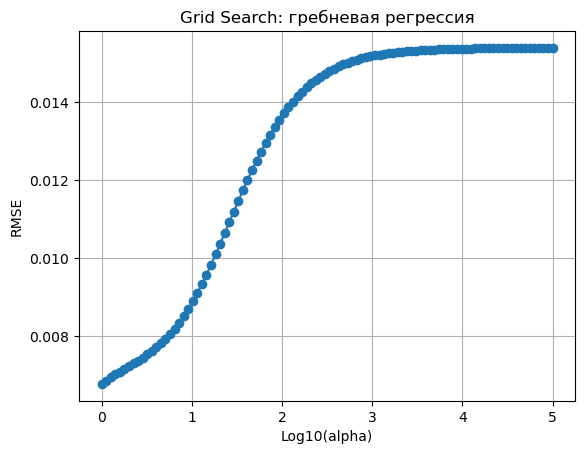

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

def grid_search_best_model(X_train, Y_train):
    # Сетка гиперпараметров для модели Ridge
    param_grid = {'alpha': np.logspace(0, 5, 100)}

    model_ridge = Ridge()
    model_poly = PolynomialFeatures(degree=4)
    X_train = pd.DataFrame(model_poly.fit_transform(X_train))
    grid_search = GridSearchCV(estimator=model_ridge, param_grid=param_grid, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Обучаем модель
    grid_search.fit(X_train, Y_train)


    best_alpha = grid_search.best_params_['alpha']
    best_rmse = np.sqrt(-grid_search.best_score_)
    
    print(f"Лучший гиперпараметр alpha: {best_alpha}")
    print(f"Лучший RMSE: {best_rmse}")


    alphas = np.array(grid_search.cv_results_['param_alpha'].astype(float))  # Преобразуем к float
    log_alphas = np.log10(alphas) 


    mean_test_scores = np.sqrt(-grid_search.cv_results_['mean_test_score'])

    plt.plot(log_alphas, mean_test_scores, marker='o')
    plt.xlabel('Log10(alpha)')
    plt.ylabel('RMSE')
    plt.title('Grid Search: гребневая регрессия')
    plt.grid(True)
    plt.show()

    return best_alpha, best_rmse


X_train, X_test, Y_train, Y_test = train_test_split(df_base_normilized.drop(columns='отопительная нагрузка'), df_base_normilized['отопительная нагрузка'], test_size=TEST_SIZE, random_state=SEED)
best_alpha_train, best_rmse_train = grid_search_best_model(X_train, Y_train)




In [ ]:
best_alpha_test, best_rmse_test = grid_search_best_model(X_test, Y_test)

Или так я хз

In [ ]:
df_base.head()

ipywidgets          8.1.5

matplotlib          3.10.0

numpy               2.1.3

pandas              2.2.3

plotly              5.24.1

seaborn             0.13.2

session_info        1.0.0

sklearn             1.6.1


In [ ]:
from pickle import dump
model = Ridge(alpha = best_alpha_test)


model_poly = PolynomialFeatures(degree=5)
X_train_ = pd.DataFrame(model_poly.fit_transform(X_train))
model.fit(X_train_, Y_train)
dump(model, open("model.pkl", 'wb'))
dump(model_poly, open('poly_features.pkl', 'wb'))

In [ ]:
X_train.head()